In [1]:
# Seaborn visualization library
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame

In [2]:
#****** Running Forecast for Plot 1 *******  Note: Data has been QC-ed

#read Plot 1 data
data = read_excel('../plotData/SkyLine_QC0.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [3]:
data

,QC,Plot_ID,DailyRep,treatment,Date,pv,ghg,unit,flux,r2,nrmse,podpu,epoch_time,DateTime
0,0,7,0,F50,2019-03-26,***,N2O_dry,mug,-76.9603,0.0782,0.2005,0.7741,1553623830,2019-03-26 18:07:00
1,0,11,0,F75 + Clover,2019-03-26,***,N2O_dry,mug,-108.6953,0.0852,0.1823,0.7372,1553625601,2019-03-26 18:37:00
2,0,12,0,F100,2019-03-26,***,N2O_dry,mug,-89.4384,0.0902,0.1720,0.7898,1553626021,2019-03-26 18:44:00
3,0,13,0,F75,2019-03-26,***,N2O_dry,mug,70.0648,0.0841,0.1829,0.8564,1553626467,2019-03-26 18:51:00
4,0,14,0,F50,2019-03-26,***,N2O_dry,mug,-81.0646,0.0641,0.1695,0.7054,1553626891,2019-03-26 18:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36392,0,32,5,F75 + Compost,2019-06-30,***,CO2_dry,mg,1073.0730,0.9970,0.0166,0.5670,1561936351,2019-06-30 23:09:00
36393,0,33,5,F50 + Clover,2019-06-30,***,CO2_dry,mg,926.1353,0.9879,0.0354,0.4470,1561936770,2019-06-30 23:16:00
36394,0,34,5,F50,2019-06-30,***,CO2_dry,mg,612.4387,0.9867,0.0339,0.5861,1561937220,2019-06-30 23:24:00
36395,0,35,5,F50 + Compost,2019-06-30,***,CO2_dry,mg,828.4506,0.9956,0.0188,0.6006,1561937641,2019-06-30 23:31:00


In [4]:
data.columns

Index(['QC', 'Plot_ID', 'DailyRep', 'treatment', 'Date', 'pv', 'ghg', 'unit',
       'flux', 'r2', 'nrmse', 'podpu', 'epoch_time', 'DateTime'],
      dtype='object')

In [5]:
#Drop columns that are not required
#df.drop(['B', 'C'], axis=1)

data.drop(['QC', 'DailyRep', 'Date', 'pv', 'unit', 'r2', 'nrmse', 'podpu', 'epoch_time'], axis=1, inplace=True)

In [6]:
data

,Plot_ID,treatment,ghg,flux,DateTime
0,7,F50,N2O_dry,-76.9603,2019-03-26 18:07:00
1,11,F75 + Clover,N2O_dry,-108.6953,2019-03-26 18:37:00
2,12,F100,N2O_dry,-89.4384,2019-03-26 18:44:00
3,13,F75,N2O_dry,70.0648,2019-03-26 18:51:00
4,14,F50,N2O_dry,-81.0646,2019-03-26 18:58:00
...,...,...,...,...,...
36392,32,F75 + Compost,CO2_dry,1073.0730,2019-06-30 23:09:00
36393,33,F50 + Clover,CO2_dry,926.1353,2019-06-30 23:16:00
36394,34,F50,CO2_dry,612.4387,2019-06-30 23:24:00
36395,35,F50 + Compost,CO2_dry,828.4506,2019-06-30 23:31:00


In [7]:
data

,Plot_ID,treatment,ghg,flux,DateTime
0,7,F50,N2O_dry,-76.9603,2019-03-26 18:07:00
1,11,F75 + Clover,N2O_dry,-108.6953,2019-03-26 18:37:00
2,12,F100,N2O_dry,-89.4384,2019-03-26 18:44:00
3,13,F75,N2O_dry,70.0648,2019-03-26 18:51:00
4,14,F50,N2O_dry,-81.0646,2019-03-26 18:58:00
...,...,...,...,...,...
36392,32,F75 + Compost,CO2_dry,1073.0730,2019-06-30 23:09:00
36393,33,F50 + Clover,CO2_dry,926.1353,2019-06-30 23:16:00
36394,34,F50,CO2_dry,612.4387,2019-06-30 23:24:00
36395,35,F50 + Compost,CO2_dry,828.4506,2019-06-30 23:31:00


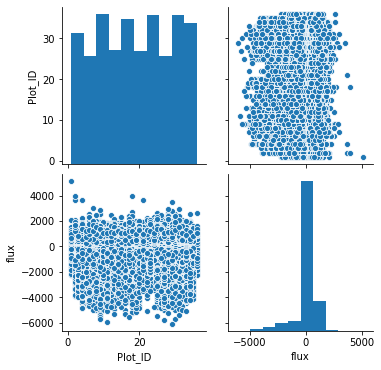

In [8]:
#Visualise the data - using pair plot (scatterplot matrix)

# Create the default pairplot
sns.pairplot(data)


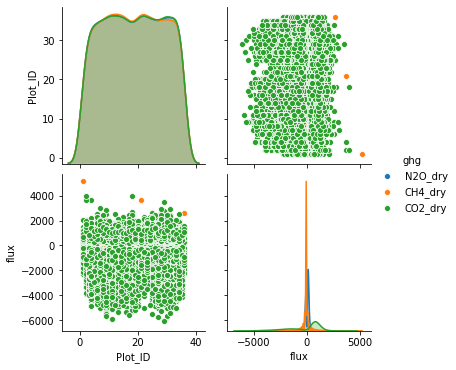

In [9]:
sns.pairplot(data, hue = 'ghg')

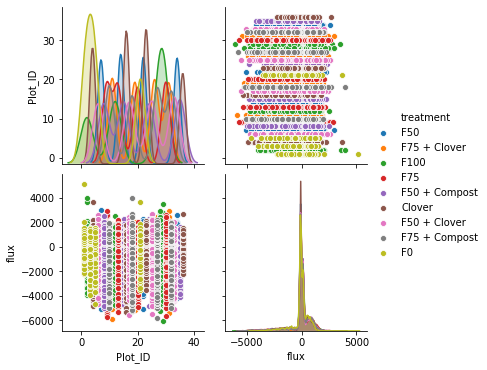

In [10]:
sns.pairplot(data, hue = 'treatment')

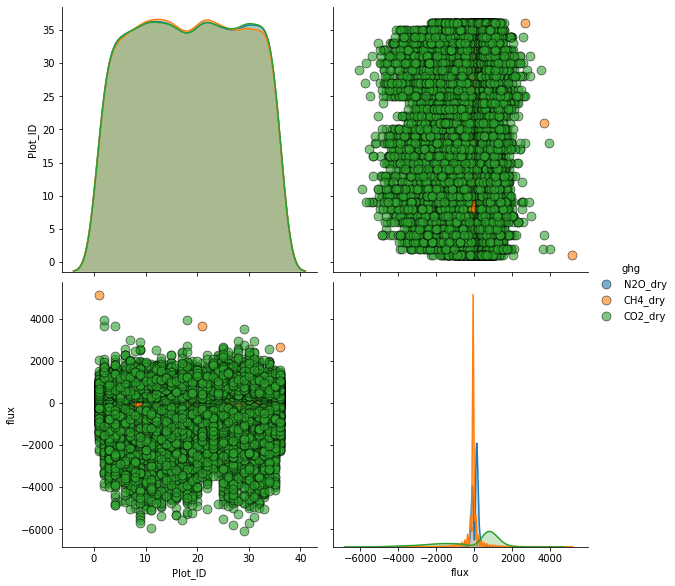

In [11]:
# Create a pair plot colored by continent with a density plot of the diagonal and format the scatter plots.
sns.pairplot(data, hue = 'ghg', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

In [12]:
data

,Plot_ID,treatment,ghg,flux,DateTime
0,7,F50,N2O_dry,-76.9603,2019-03-26 18:07:00
1,11,F75 + Clover,N2O_dry,-108.6953,2019-03-26 18:37:00
2,12,F100,N2O_dry,-89.4384,2019-03-26 18:44:00
3,13,F75,N2O_dry,70.0648,2019-03-26 18:51:00
4,14,F50,N2O_dry,-81.0646,2019-03-26 18:58:00
...,...,...,...,...,...
36392,32,F75 + Compost,CO2_dry,1073.0730,2019-06-30 23:09:00
36393,33,F50 + Clover,CO2_dry,926.1353,2019-06-30 23:16:00
36394,34,F50,CO2_dry,612.4387,2019-06-30 23:24:00
36395,35,F50 + Compost,CO2_dry,828.4506,2019-06-30 23:31:00


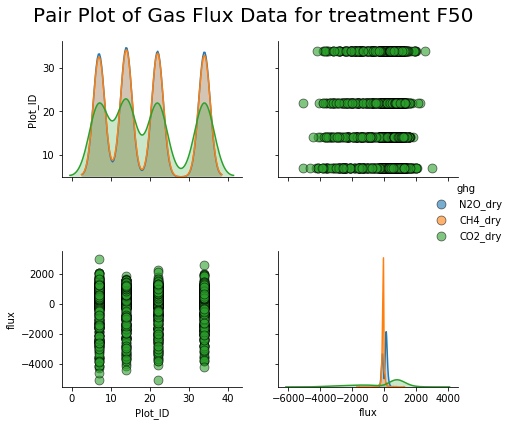

In [13]:
# Plot colored by ghg for treatment F50
sns.pairplot(data[data['treatment'] == 'F50'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment F50', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

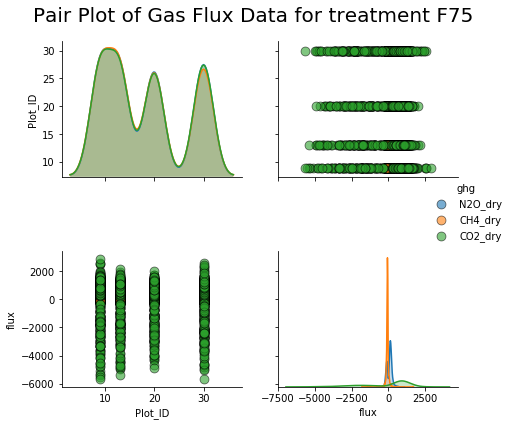

In [14]:
# Plot colored by ghg for treatment F75
sns.pairplot(data[data['treatment'] == 'F75'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment F75', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

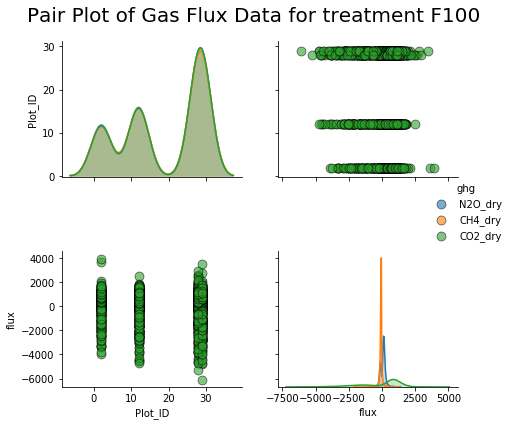

In [15]:
# Plot colored by ghg for treatment F100
sns.pairplot(data[data['treatment'] == 'F100'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment F100', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

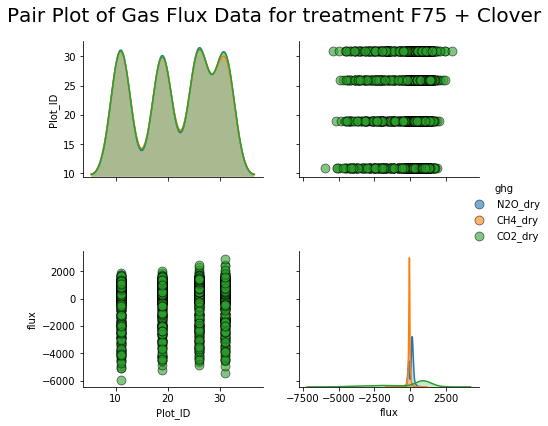

In [16]:
# Plot colored by ghg for treatment F75+Clover
sns.pairplot(data[data['treatment'] == 'F75 + Clover'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment F75 + Clover', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

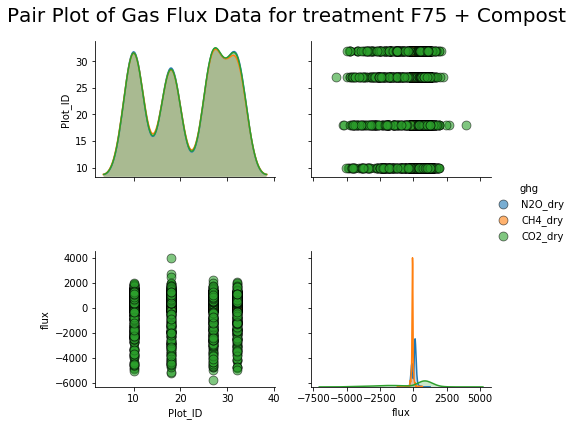

In [17]:
# Plot colored by ghg for treatment F75+Compost
sns.pairplot(data[data['treatment'] == 'F75 + Compost'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment F75 + Compost', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

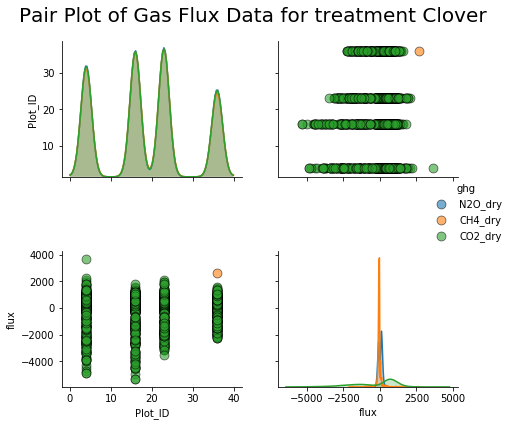

In [18]:
# Plot colored by ghg for treatment Clover
sns.pairplot(data[data['treatment'] == 'Clover'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'ghg', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for treatment Clover', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

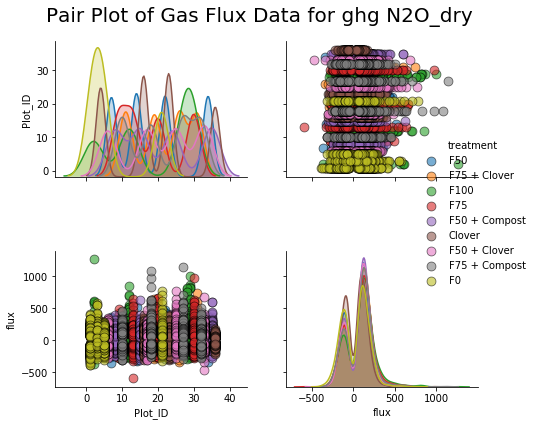

In [19]:
# Plot colored by ghg for ghg N2O_dry
sns.pairplot(data[data['ghg'] == 'N2O_dry'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'treatment', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for ghg N2O_dry', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

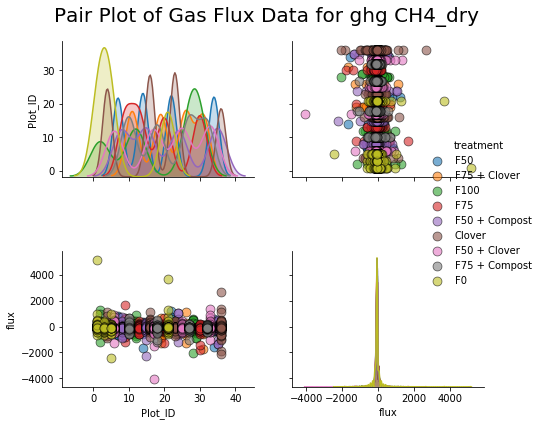

In [20]:
# Plot colored by ghg for ghg CH4_dry
sns.pairplot(data[data['ghg'] == 'CH4_dry'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'treatment', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for ghg CH4_dry', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

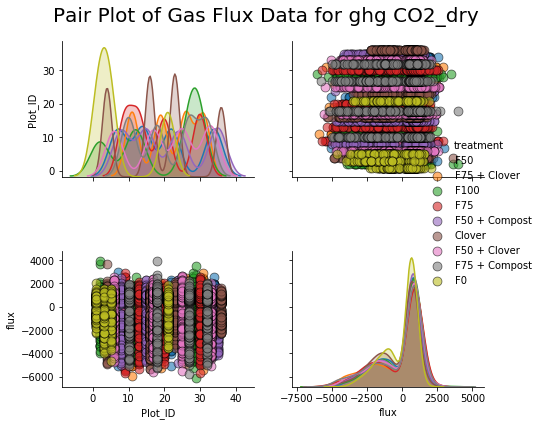

In [21]:
# Plot colored by ghg for ghg CO2_dry
sns.pairplot(data[data['ghg'] == 'CO2_dry'], 
             vars = ['Plot_ID', 'flux'], 
             hue = 'treatment', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3);
# Title 
plt.suptitle('Pair Plot of Gas Flux Data for ghg CO2_dry', 
             size = 20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

In [ ]:
#Customisation with PairGrid

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= data[data['ghg'] == 'CO2_dry'],
                    vars = ['Plot_ID', 'flux'], size = 4)

#There are 3 grid sections to fill in for the PairGrid - upper, diagonal, lower

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

In [23]:
data

,Plot_ID,treatment,ghg,flux,DateTime
0,7,F50,N2O_dry,-76.9603,2019-03-26 18:07:00
1,11,F75 + Clover,N2O_dry,-108.6953,2019-03-26 18:37:00
2,12,F100,N2O_dry,-89.4384,2019-03-26 18:44:00
3,13,F75,N2O_dry,70.0648,2019-03-26 18:51:00
4,14,F50,N2O_dry,-81.0646,2019-03-26 18:58:00
...,...,...,...,...,...
36392,32,F75 + Compost,CO2_dry,1073.0730,2019-06-30 23:09:00
36393,33,F50 + Clover,CO2_dry,926.1353,2019-06-30 23:16:00
36394,34,F50,CO2_dry,612.4387,2019-06-30 23:24:00
36395,35,F50 + Compost,CO2_dry,828.4506,2019-06-30 23:31:00


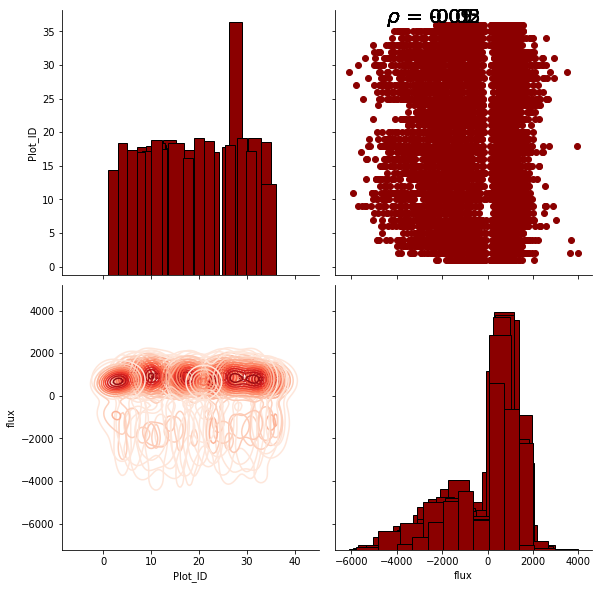

In [24]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

    
# Create a pair grid instance
grid = sns.PairGrid(data= data[data['ghg'] == 'CO2_dry'],
                    vars = ['Plot_ID', 'flux'], hue = 'treatment', height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');